In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
X=mnist.load_data()

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
from keras.datasets import mnist
# Import de MNIST depuis Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Transformation des images 28x28 en vecteur de dimension 784
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')
# Normalisation entre 0 et 1
X_train /= 255
X_test /= 255

# Affichage du nombre de'exemples
print(f"{X_train.shape[0]} exemples d'apprentissage")
print(f"{X_test.shape[0]} exemples de test")

60000 exemples d'apprentissage
10000 exemples de test


Afficher les premiéres images du jeux d'apprentissage avec plt.imshow()

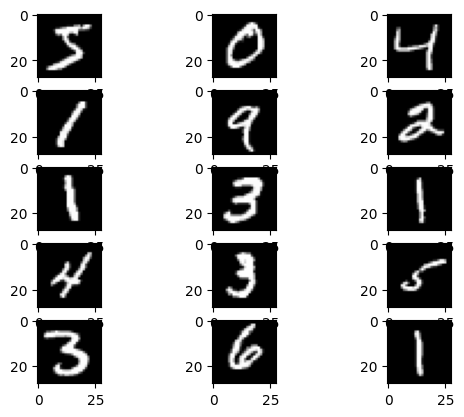

In [5]:
number_of_images = 17
ncol = min(3,number_of_images)
nrow=number_of_images//3

fig, ax = plt.subplots(nrows=nrow,ncols=ncol)
for ax,i in zip(ax.reshape(-1),range(number_of_images )):
    ax.imshow(X_train[i].reshape(28,28),cmap=plt.get_cmap('gray'))
plt.show()

Quel est l’espace dans lequel se trouvent les images ? Quelle est sa dimension ?

[0,1]^(28*28)

Quel est le nombre de paramétre du modéle ? Justifier le calcul

10+10x28x28 = 78 50 paramétres 

Génération des étiquettes (labels) au format one-hot

In [6]:
from keras.utils import to_categorical
n_classes = 10
# Conversion des étiquettes (int) au format vectoriel one-hot
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

Squelette d l’algorithme de descente de gradient qui va permettre l’optimisation des paramètres du modèle

In [206]:
def forward(batch,W,b):
    f_index = batch*batch_size
    e_index =(batch+1)*batch_size
    b_batch=np.repeat(b, batch_size, axis=0)
    return softmax(np.dot(X_train[f_index:e_index],W)+b_batch)

def softmax(X):
     # Entrée: matrice X de dimensions batch x d
     # Sortie: matrice de mêmes dimensions
    E= np.exp(X)
    return (E.T / np.sum(E,axis=1)).T

def backward(batch,W,b):
    f_index = batch*batch_size
    e_index =(batch+1)*batch_size

    diff =  forward(batch,W,b)-Y_train[f_index:e_index]
    
    gradW=1/batch_size*np.dot(X_train[f_index:e_index].T,diff)                         
    gradb=np.mean(diff,axis=0)
    
    W = W -eta*gradW
    b=b-eta*gradb

    return W,b

In [207]:
import numpy as np
N, d = X_train.shape # N exemples, dimension d
W = np.zeros((d, n_classes)) # initialisation de poids
b = np.zeros((1, n_classes)) # initialisation des biais

n_epochs = 15 # Nombre d'epochs de la descente de gradient
eta = 1e-1 # Learning rate (pas d'apprentissage)
batch_size = 100 # Taille du lot
n_batches = int(float(N) / batch_size)

# On alloue deux matrices pour stocker les valeurs des gradients
gradW = np.zeros((d, n_classes))
gradb = np.zeros((1, n_classes))

for epoch in range(n_epochs):
    for batch_idx in range(n_batches):
        W,b=backward(batch_idx,W,b)


In [218]:
def forwardImages(W, b, images):
    number_images = images.shape[0]
    b_number_images = np.repeat(b,number_images,axis=0)
 
    return softmax(np.dot(images,W)+b_number_images)


In [219]:
def accuracy(W, b, images, labels):
 
    pred = forwardImages(W, b,images)
    return np.where(pred.argmax(axis=1) != labels.argmax(axis=1), 0.,1.).mean()

In [217]:
accuracy(W,b,X_train,Y_train)

(60000, 784)
(60000, 784) (784, 10)


0.9231166666666667